In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-13,19.290001,21.180000,18.959999,20.309999,20.309999,0.0
2021-12-14,19.670000,23.000000,19.670000,21.889999,21.889999,0.0
2021-12-15,21.600000,23.469999,19.020000,19.290001,19.290001,0.0
2021-12-16,18.559999,22.129999,18.190001,20.570000,20.570000,0.0
2021-12-17,20.700001,23.260000,20.490000,21.570000,21.570000,0.0


In [4]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3.322050e+09
2021-12-14,4642.990234,4660.470215,4606.520020,4634.089844,4634.089844,3.292740e+09
2021-12-15,4636.459961,4712.600098,4611.220215,4709.850098,4709.850098,3.367580e+09
2021-12-16,4719.129883,4731.990234,4651.890137,4668.669922,4668.669922,3.592810e+09
2021-12-17,4652.500000,4666.700195,4600.220215,4620.640137,4620.640137,5.609780e+09


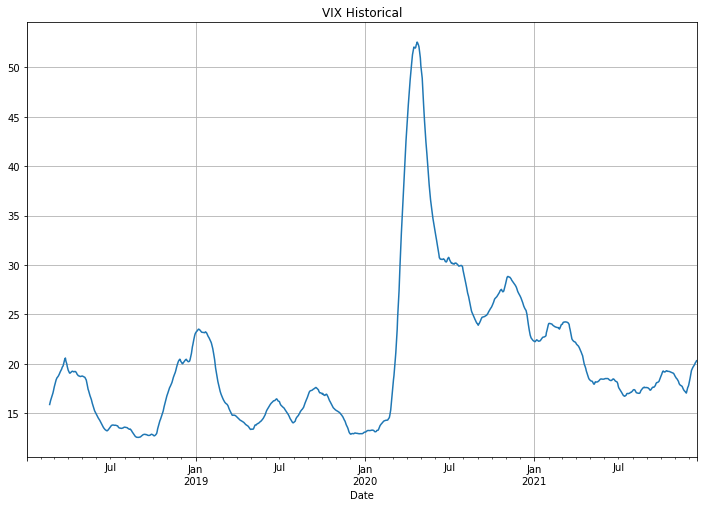

In [5]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

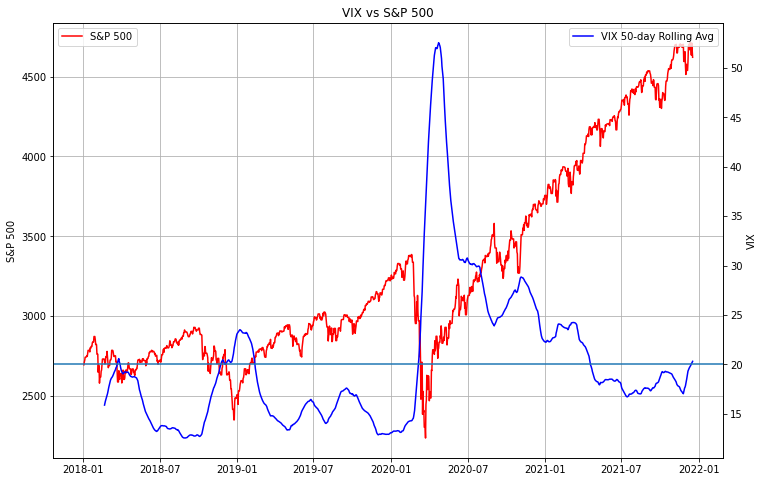

In [6]:
#Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)